In [8]:
import time

import os; os.environ['GEOMSTATS_BACKEND'] = 'pytorch'
import matplotlib.pyplot as plt

import geomstats.backend as gs

from geomstats.geometry.base import ImmersedSet
from geomstats.geometry.pullback_metric import (
    PullbackMetric,
    PullbackDiffeoMetric,
)
# from geomstats.geometry.diffeo import Diffeo
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

import geomstats.visualization as viz

In [9]:
class SphereIntrinsic(ImmersedSet):
    def __init__(self, equip=True):
        super().__init__(dim=2, equip=equip)

    def immersion(self, point):
        theta = point[..., 0]
        phi = point[..., 1]
        return gs.stack(
            [
                gs.cos(phi) * gs.sin(theta),
                gs.sin(phi) * gs.sin(theta),
                gs.cos(theta),
            ],
            axis=-1,
        )

    def _define_embedding_space(self):
        return Euclidean(dim=self.dim + 1)



In [10]:


sphere = SphereIntrinsic(equip=False)

sphere.equip_with_metric(PullbackMetric)



In [11]:
point_a = gs.array([gs.pi / 2.0, -gs.pi / 2.0])
tangent_vec = gs.array([0.0, gs.pi / 3.0])

end_point = sphere.metric.exp(tangent_vec=tangent_vec, base_point=point_a)
print(end_point)



AutodiffNotImplementedError: Automatic differentiation is not supported with numpy backend. Use autograd or pytorch backend instead.
Change backend via the command export GEOMSTATS_BACKEND=autograd in a terminal.

/home/tbertrand/anaconda3/envs/geomstats_env/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


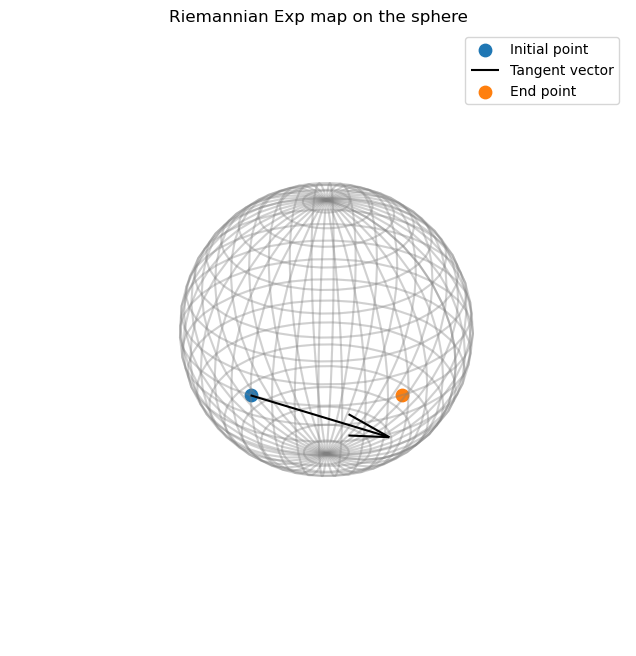

In [ ]:
%matplotlib inline

# We immerse the points and the tangent vector in R^3

immersed_point_a = sphere.immersion(point_a)
immersed_tangent_vec = sphere.tangent_immersion(tangent_vec, point_a)
immersed_end_point = sphere.immersion(end_point)

# We plot our results

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

viz.plot(immersed_point_a, ax=ax, space="S2", label="Initial point", s=80)

arrow = viz.Arrow3D(immersed_point_a, vector=immersed_tangent_vec)
arrow.draw(ax, color="black", label="Tangent vector")

viz.plot(immersed_end_point, ax=ax, space="S2", label="End point", s=80)

ax.set_title("Riemannian Exp map on the sphere")
ax.legend()
ax.grid(False)
plt.axis("off");



In [19]:
from geomstats.geometry.riemannian_metric import RiemannianMetric
from geomstats.geometry.euclidean import Euclidean
import geomstats.backend as gs


class RS_metric(RiemannianMetric):

    def __init__(self, space):
        super().__init__(space=space)
    
    def metric_matrix(self, base_point=None):
        """Metric matrix at the tangent space at a base point.

        Parameters
        ----------
        base_point : array-like, shape=[..., dim]
            Base point.
            Optional, default: None.

        Returns
        -------
        mat : array-like, shape=[..., dim, dim]
            Inner-product matrix.
        """
        return gs.eye(self.dim)

Space = Euclidean(dim=3)
   
# metric = RS_metric(Space)

# metric.metric_matrix()

Space.equip_with_metric(RS_metric)


Space.metric.exp_solver.integrator.step = "euler"
# metric.exp_solver.integrator.n_steps = 1
# metric.log_solver.optimizer.tol = 1e-6

Space.metric.dist(gs.array([0,0,0]), gs.array([1,1,1]))

AttributeError: 'RS_metric' object has no attribute 'exp_solver'